In [3]:
import numpy as np
import pandas as pd
from wordcloud import WordCloud
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import random
from pyspark import SparkConf, SparkContext
from pyspark.sql import SparkSession
import pyspark.sql.types as t
import pyspark.sql.functions as f
import seaborn as sns
import pickle
from pyspark.sql.functions import col, sum
import dataframe_image as dfi

def visualize_word_counts(counts):
    wc = WordCloud(max_font_size=130, min_font_size=25, colormap='tab20', background_color='white', 
                   prefer_horizontal=.95, width=2100, height=700, random_state=0)
    cloud = wc.generate_from_frequencies(counts)
    plt.figure(figsize=(18,15))
    plt.imshow(cloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

sns.set(style="darkgrid")

file_path = "/home/olek/studia/semestr_3_AM/Big_Data/Big_Data/projekt/data/charts.csv"
# file_path = "/home/olek/studia/semestr_3_AM/Big_Data/Big_Data/projekt/data/sample.csv"

# results_path = "/home/olek/studia/semestr_3_AM/Big_Data/Big_Data/projekt/sample_results/"
if file_path.endswith("sample.csv"):
    results_path = "/home/olek/studia/semestr_3_AM/Big_Data/Big_Data/projekt/sample_results/"
    images_path = "/home/olek/studia/semestr_3_AM/Big_Data/Big_Data/projekt/sample_images/"
else:
    results_path = "/home/olek/studia/semestr_3_AM/Big_Data/Big_Data/projekt/results/"
    images_path = "/home/olek/studia/semestr_3_AM/Big_Data/Big_Data/projekt/images/"

seed = 777
np.random.seed(seed)
random.seed(seed)

# integrity ratio by region

/tmp/ipykernel_563793/3390696078.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(procentag_region, x='region', y='procent', palette='viridis', order=procentag_region['region'], ax=ax)
/tmp/ipykernel_563793/3390696078.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(procentag_region["region"], rotation=90)


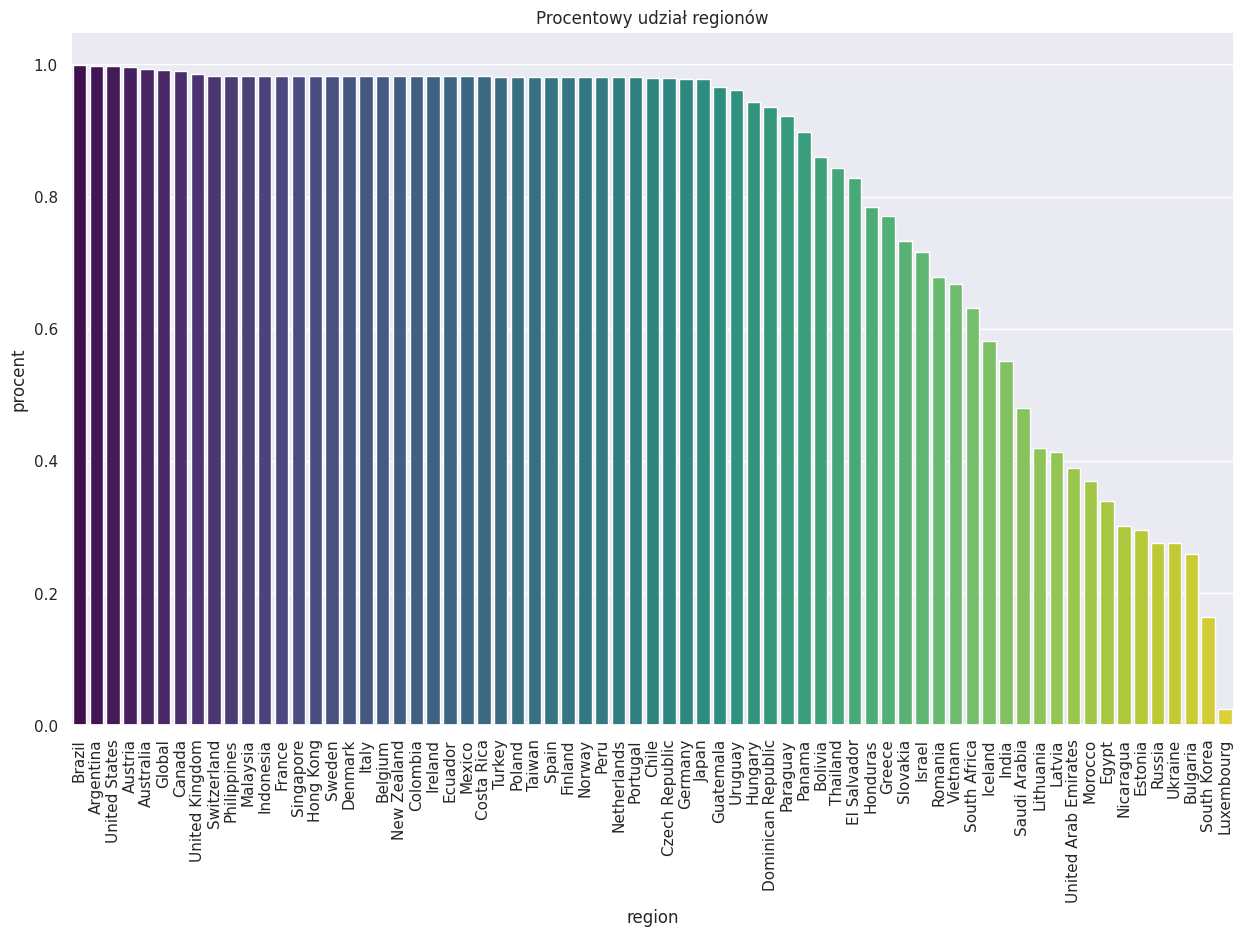

In [90]:
with open(results_path + "procentag_region.pkl", "rb") as f:
    procentag_region = pickle.load(f)

fig, ax = plt.subplots(figsize=(15, 9))
sns.barplot(procentag_region, x='region', y='procent', palette='viridis', order=procentag_region['region'], ax=ax)
ax.set_xticklabels(procentag_region["region"], rotation=90)
plt.title("Procentowy udział regionów")
plt.show()

# artist_counts

/tmp/ipykernel_563793/528903780.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(artist_counts_pd[:20], x="song_count", y='artist', palette='viridis', ax=ax)


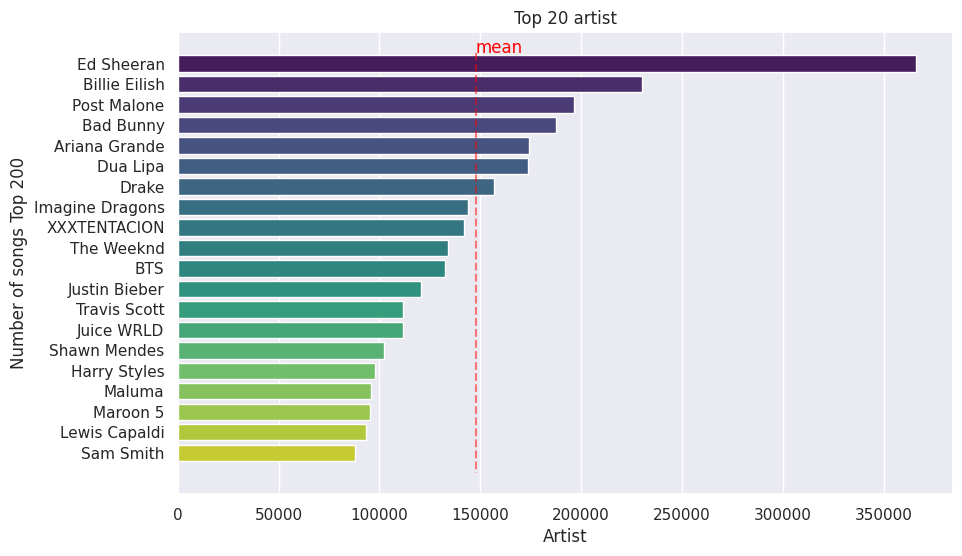

In [93]:
with open(results_path + "artist_counts.pkl", "rb") as f:
    artist_counts_pd = pickle.load(f)


fig, ax = plt.subplots(figsize=(10, 6))
# plt.barh(artist_counts_pd['artist'], artist_counts_pd['song_count'])
sns.barplot(artist_counts_pd[:20], x="song_count", y='artist', palette='viridis', ax=ax)
ax.set_title('Top 20 artist')
ax.set_xlabel('Artist')
ax.set_ylabel('Number of songs Top 200')
ax.vlines(artist_counts_pd['song_count'][:20].mean(), -0.5, 20, colors='red', linestyles='dashed', alpha=0.5)
ax.text(artist_counts_pd['song_count'][:20].mean(), -0.5, 'mean', color='red')
# ax.set_xticklabels(artist_counts_pd["artist"], rotation=90)
plt.show()

In [46]:
region_top_artist_df.groupby("region").head()

,artist,region,count
0,Marília Mendonça,Brazil,11059
1,Juice WRLD,United States,10524
2,Post Malone,United States,10436
3,Zé Neto & Cristiano,Brazil,9385
4,Henrique & Juliano,Brazil,8914
5,XXXTENTACION,United States,8807
6,Jorge & Mateus,Brazil,8395
7,Drake,United States,8226
8,Taco Hemingway,Poland,7976
9,Billie Eilish,United States,7317


/tmp/ipykernel_563793/1630580556.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g= sns.catplot(data=region_top_artist_df.groupby("region").head(10),


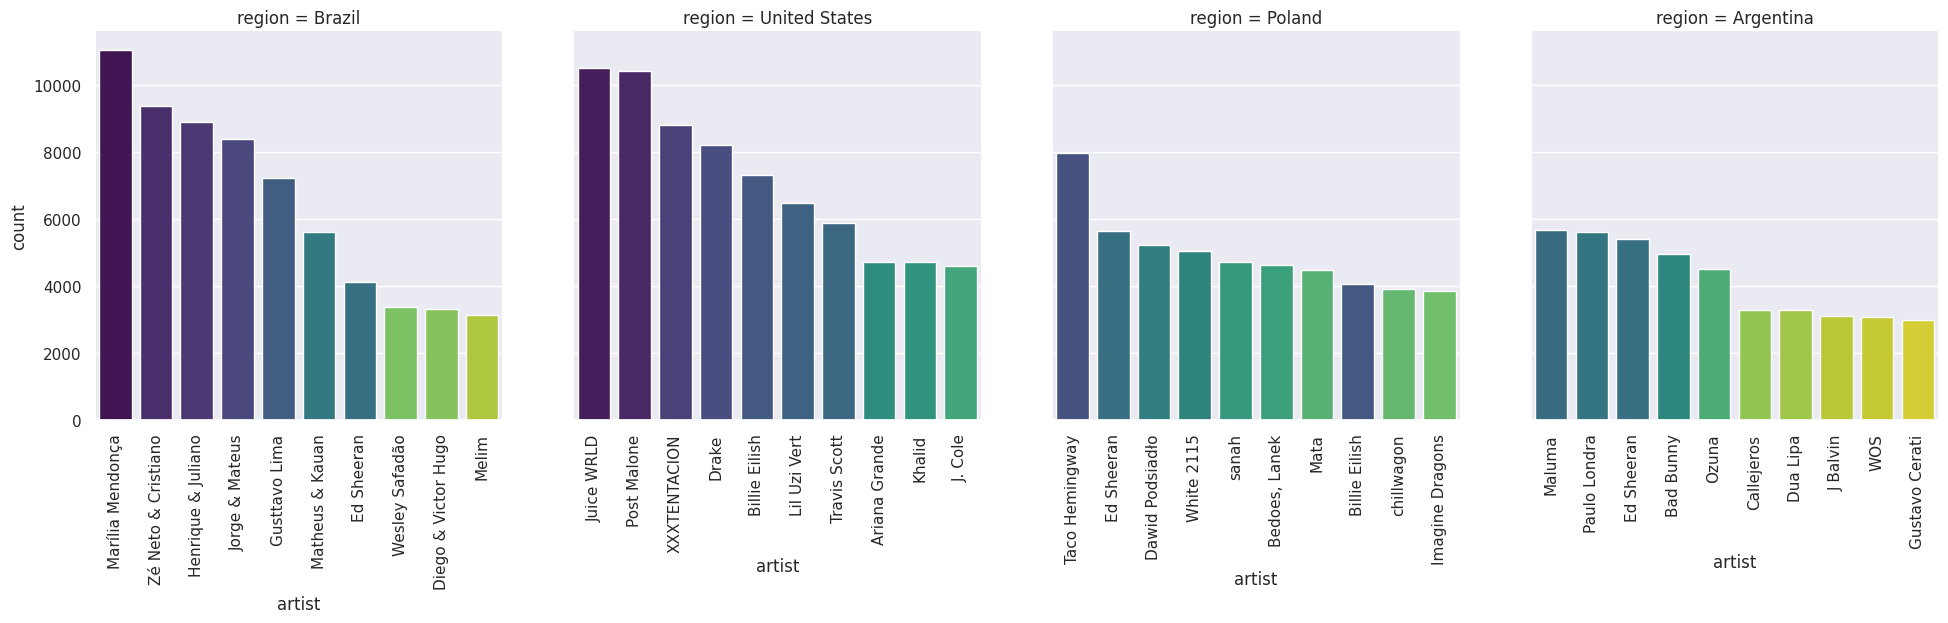

In [158]:
with open(results_path + "region_top_artist.pkl", "rb") as f:
    region_top_artist_df = pickle.load(f)
region_top_artist_df.head()
g= sns.catplot(data=region_top_artist_df.groupby("region").head(10),
            x='artist', y='count',
            col="region", col_wrap=4,
            kind="bar", 
            sharey=True, sharex=False,
            palette='viridis')
g.set_xticklabels(rotation=90)

plt.show()

## total streams

/tmp/ipykernel_563793/3511834723.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(strem_per_yers_pd, x='year', y='streams', palette='viridis')


<Axes: xlabel='year', ylabel='streams'>

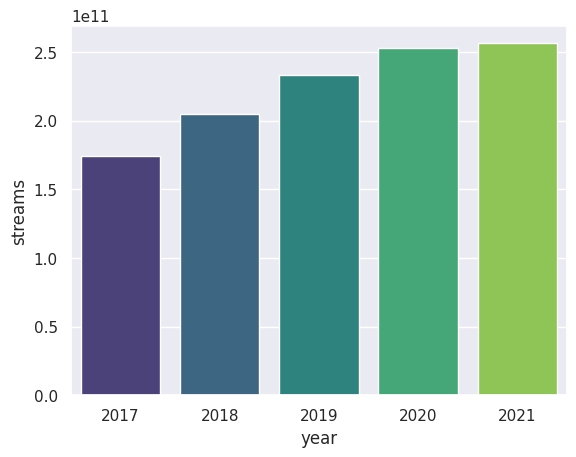

In [58]:
with open(results_path + "strem_per_year.pkl", "rb") as f:
    strem_per_yers_pd = pickle.load(f)
sns.barplot(strem_per_yers_pd, x='year', y='streams', palette='viridis')

## MOust popular artist in years

/tmp/ipykernel_563793/1395094210.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(most_popoular_aritst_in_year_pd.groupby("year").head(),


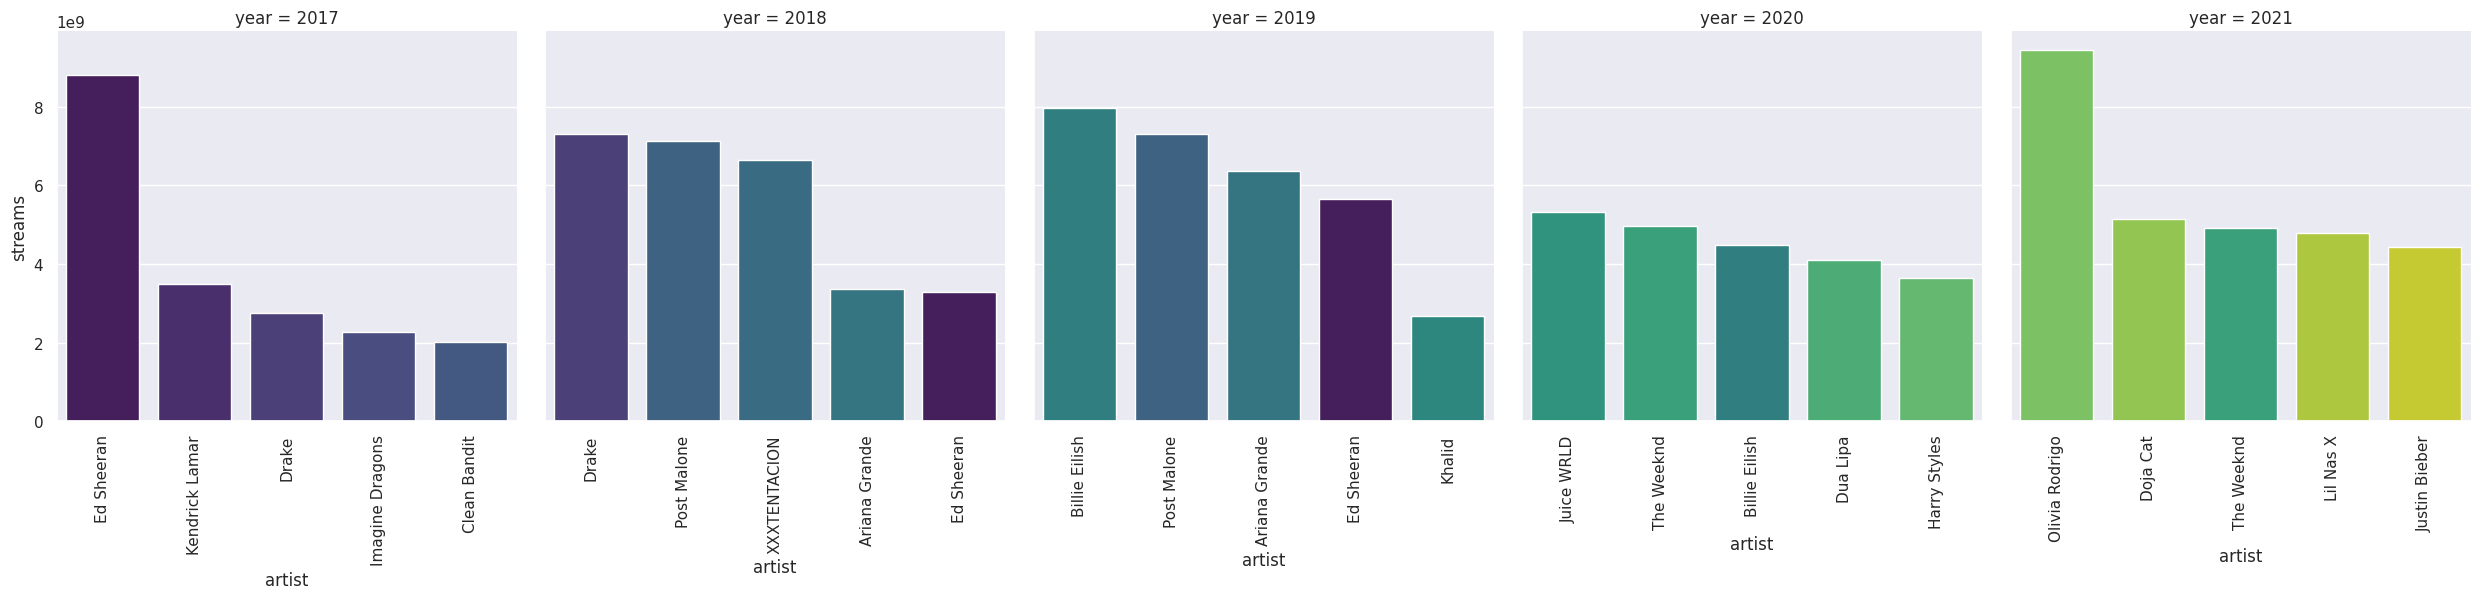

In [68]:
with open(results_path + "most_popoular_aritst_in_year.pkl", "rb") as f:
    most_popoular_aritst_in_year_pd = pickle.load(f)
    
g = sns.catplot(most_popoular_aritst_in_year_pd.groupby("year").head(),
            x='artist', y='streams',
            col="year", palette='viridis', sharex=False,
            kind='bar')
g.set_xticklabels(rotation=90)


## market_share_development

/tmp/ipykernel_5174/450533743.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(market_share_pd, y="procent", x='year', col='region', palette='viridis', kind='bar', sharex=False, height=4, aspect=0.6)


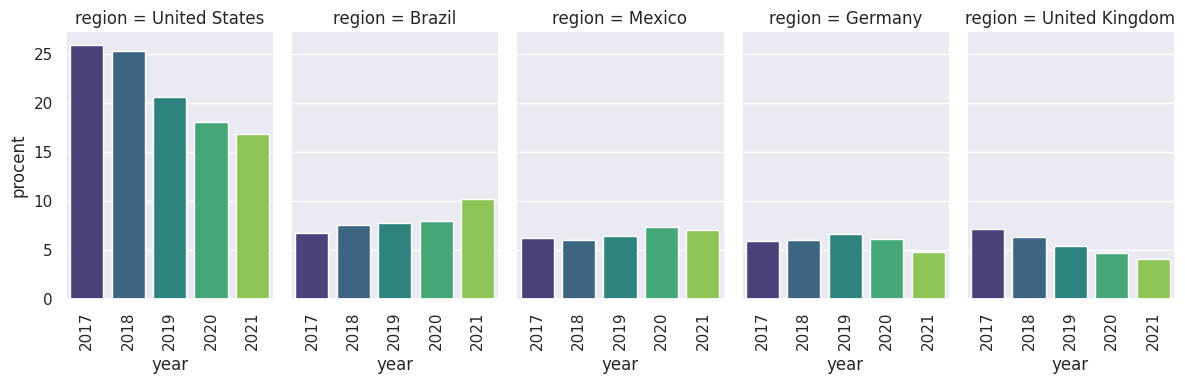

In [139]:
with open(results_path + "market_share_development.pkl", "rb") as f:
    market_share_development_pd = pickle.load(f)
sums = market_share_development_pd.groupby("year")["streams"].sum()
market_share_development_pd["procent"] = market_share_development_pd.apply(lambda x: x["streams"]/sums[x["year"]], axis=1)*100
market_share_development_pd.sort_values(by=["year","procent"], ascending=False, inplace=True)
market_share_pd = market_share_development_pd.groupby("year").head(5)
# market_share_development_pd["procent"] = market_share_development_pd.groupby("year")["streams"].apply(lambda x: x/sums)
g = sns.catplot(market_share_pd, y="procent", x='year', col='region', palette='viridis', kind='bar', sharex=False, height=4, aspect=0.6)
g.set_xticklabels(rotation=90)
g.tight_layout()

In [243]:
market_share_development_pd
sns.pie

,year,region,streams,procent,growth
315,2021,Vietnam,614377202,0.382271,0.087251
314,2021,Uruguay,331419473,0.206212,0.010557
313,2021,United States,27093009816,16.857495,-1.279101
312,2021,United Kingdom,6562881981,4.083480,-0.566970
311,2021,United Arab Emirates,163635143,0.101815,0.033612
...,...,...,...,...,...
4,2017,Bolivia,94319700,0.095081,NaN
3,2017,Belgium,544124821,0.548515,NaN
2,2017,Austria,333840016,0.336534,NaN
1,2017,Australia,3283499394,3.309994,NaN


/tmp/ipykernel_5174/1567865473.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  YoY_growth_pd.sort_values(by=["procent"], ascending=False, inplace=True)


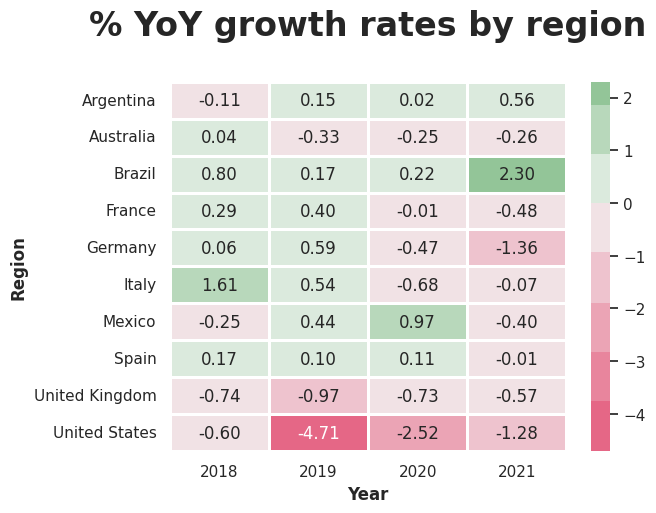

In [193]:
import matplotlib.colors as mcolors

market_share_development_pd.sort_values(by=["year","procent"], ascending=False, inplace=True)
YoY_growth_pd = market_share_development_pd
YoY_growth_pd.sort_values(by=["year", "region"], ascending=False, inplace=True)
diff = YoY_growth_pd.groupby(["region"])["procent"].diff(-1)
YoY_growth_pd["growth"] = diff
YoY_growth_pd = YoY_growth_pd[YoY_growth_pd["year"] != 2017]
YoY_growth_pd.sort_values(by=["procent"], ascending=False, inplace=True)
regions_to_slect = YoY_growth_pd.groupby("region").head(1).head(10)["region"]
YoY_growth_pd = YoY_growth_pd[YoY_growth_pd["region"].isin(regions_to_slect)]

cmap = sns.diverging_palette(h_neg=0, h_pos=130, s=70, l=60, n=10)
sns.heatmap(YoY_growth_pd.pivot(index="region", columns="year", values="growth"),
            cmap=cmap, annot=True, fmt=".2f", linewidths=2, annot_kws={"size":12},
            center=0)
plt.title('% YoY growth rates by region\n', fontsize=24, fontweight='bold')
plt.ylabel('Region', fontsize=12, fontweight='bold')
plt.xlabel('Year', fontsize=12, fontweight='bold')
plt.show()

# avg_rank_by_region_pd

/tmp/ipykernel_5174/2730440013.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.barplot(avg_rank_by_region_pd, x='region', y='avg_rank', palette='viridis',ax=ax)
/tmp/ipykernel_5174/2730440013.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(avg_rank_by_region_pd["region"], rotation=90)


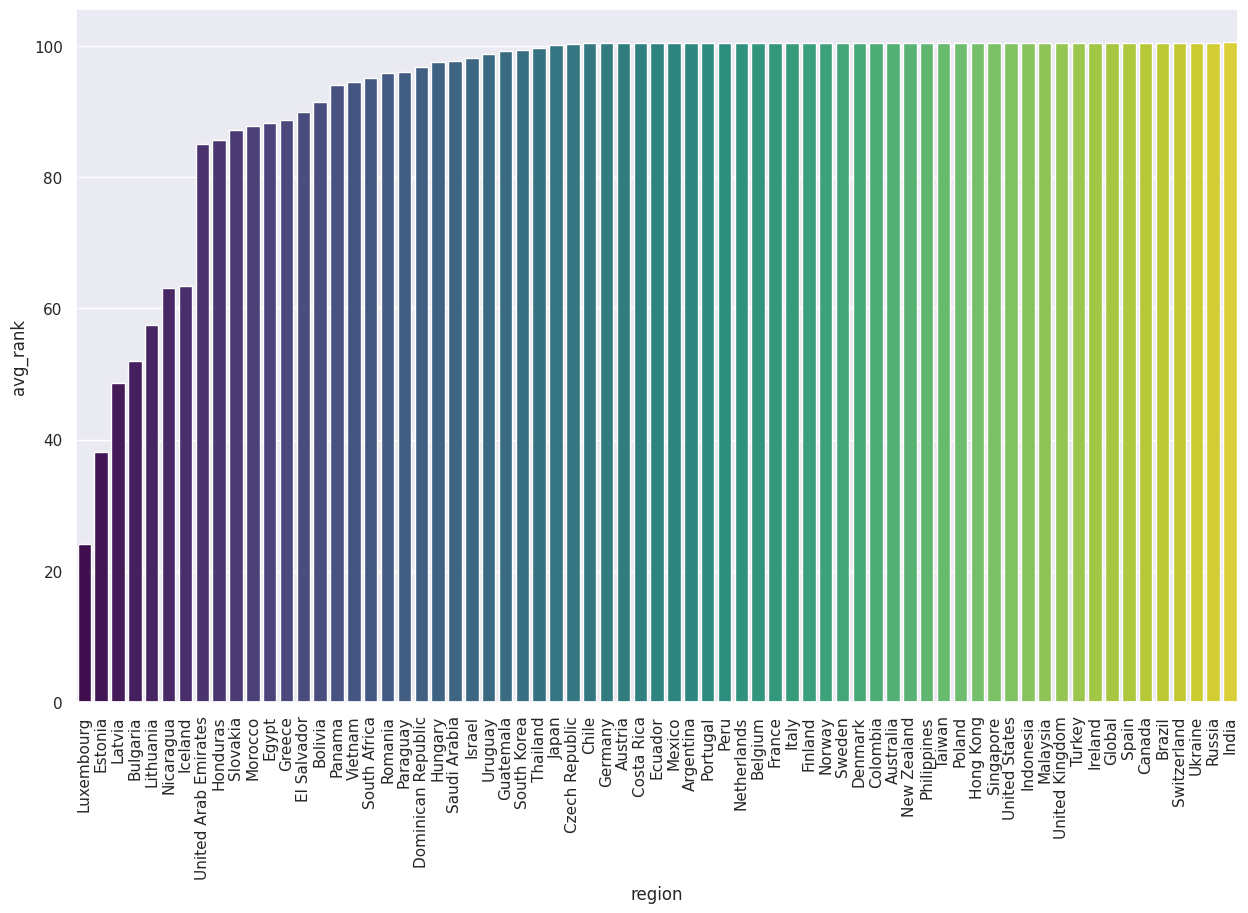

In [200]:
with open(results_path + "avg_rank_by_region_of_best_song.pkl", "rb") as f:
    avg_rank_by_region_pd = pickle.load(f)
gif, ax = plt.subplots(figsize=(15, 9))
g = sns.barplot(avg_rank_by_region_pd, x='region', y='avg_rank', palette='viridis',ax=ax)
g.set_xticklabels(avg_rank_by_region_pd["region"], rotation=90)
plt.show()

# best songs

/tmp/ipykernel_5174/1797905831.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(best_song_pd[:20], x='streams', y='title', palette='viridis', ax=ax)


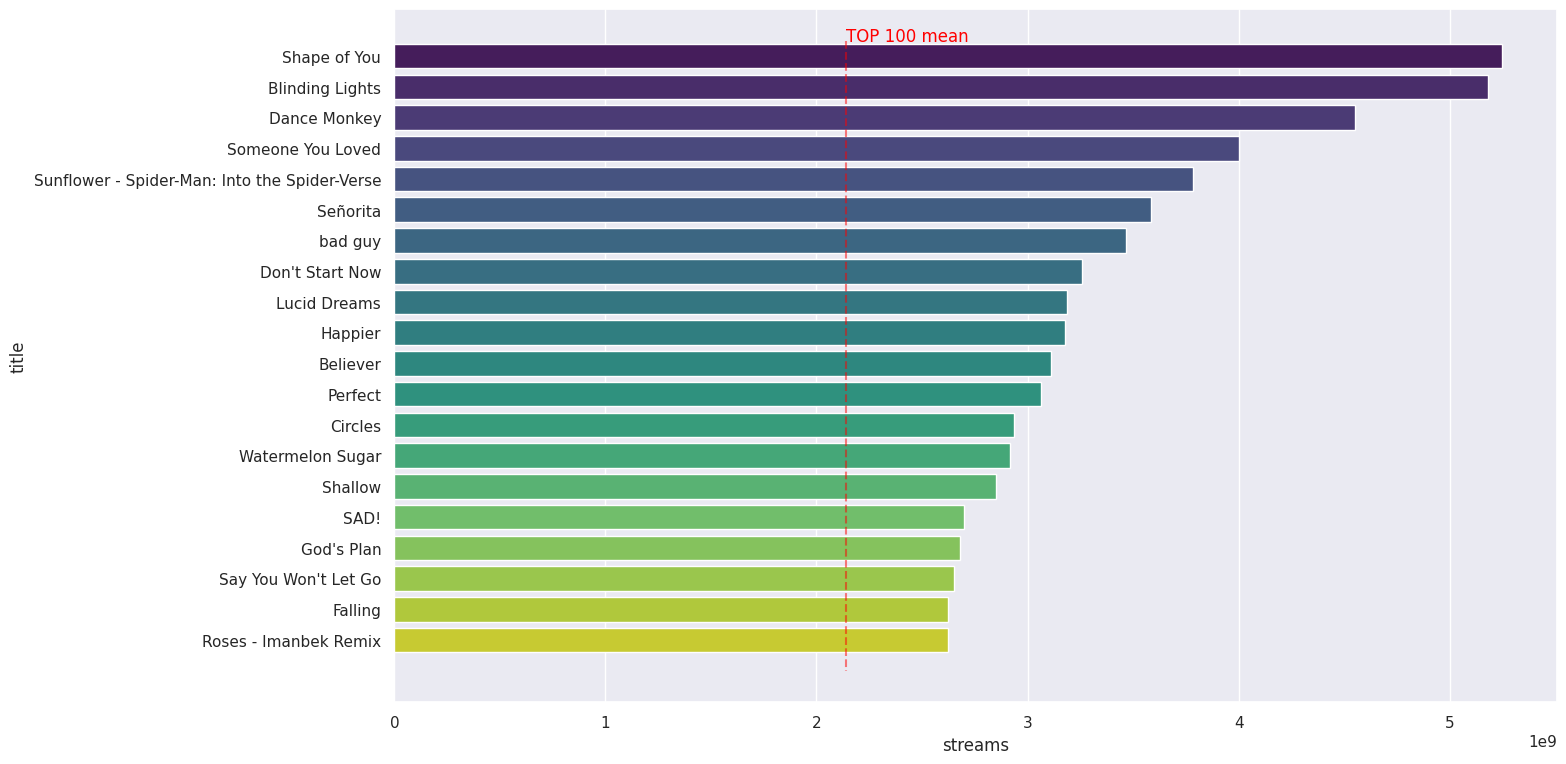

In [220]:
with open(results_path + "best_song.pkl", "rb") as f:
    best_song_pd = pickle.load(f)
fig, ax = plt.subplots(figsize=(15, 9))
sns.barplot(best_song_pd[:20], x='streams', y='title', palette='viridis', ax=ax)
ax.vlines(best_song_pd['streams'][:100].mean(), -0.5, 20, colors='red', linestyles='dashed', alpha=0.5)
ax.text(best_song_pd['streams'][:100].mean(), -0.5, 'TOP 100 mean', color='red')
plt.show()

## best songs trend

<Axes: xlabel='date', ylabel='streams'>

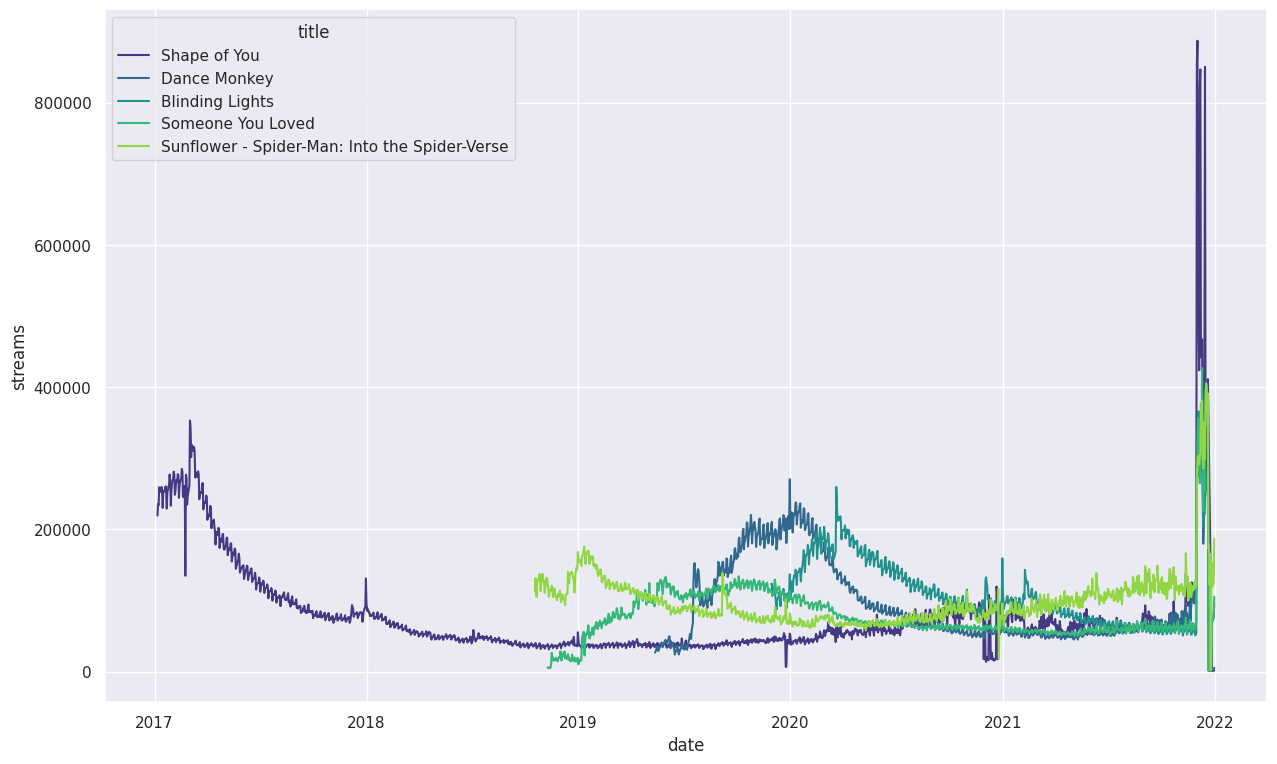

In [10]:
with open(results_path + "best_songs_hisotry.pkl", "rb") as f:
    best_songs_hisotry_pd = pickle.load(f)
fig, ax = plt.subplots(figsize=(15, 9))
sns.lineplot(best_songs_hisotry_pd, x='date', y='streams', hue='title', palette='viridis', errorbar=None, ax = ax)


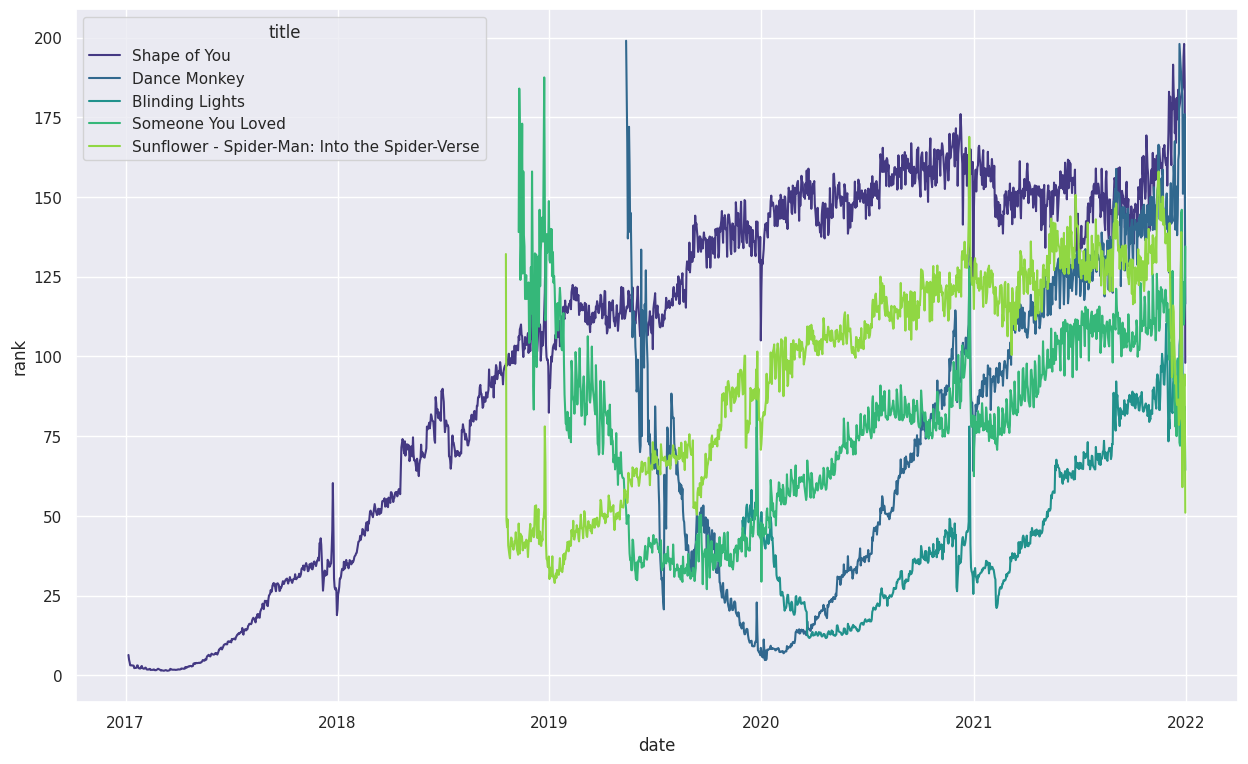

In [15]:
fig, ax = plt.subplots(figsize=(15, 9))
sns.lineplot(best_songs_hisotry_pd, x='date', y='rank', hue='title', palette='viridis', errorbar=None, ax = ax)
plt.show()

## procentag_region

In [241]:
with open(results_path + "artist_counts.pkl", "rb") as f:
    artist_counts_pd = pickle.load(f)
# fig, ax = plt.subplots(figsize=(15, 9))
# sns.barplot(artist_counts_pd[:20], x='song_count', y='artist', palette='viridis', ax=ax)
# visualize_word_counts(artist_counts_pd[:1000])

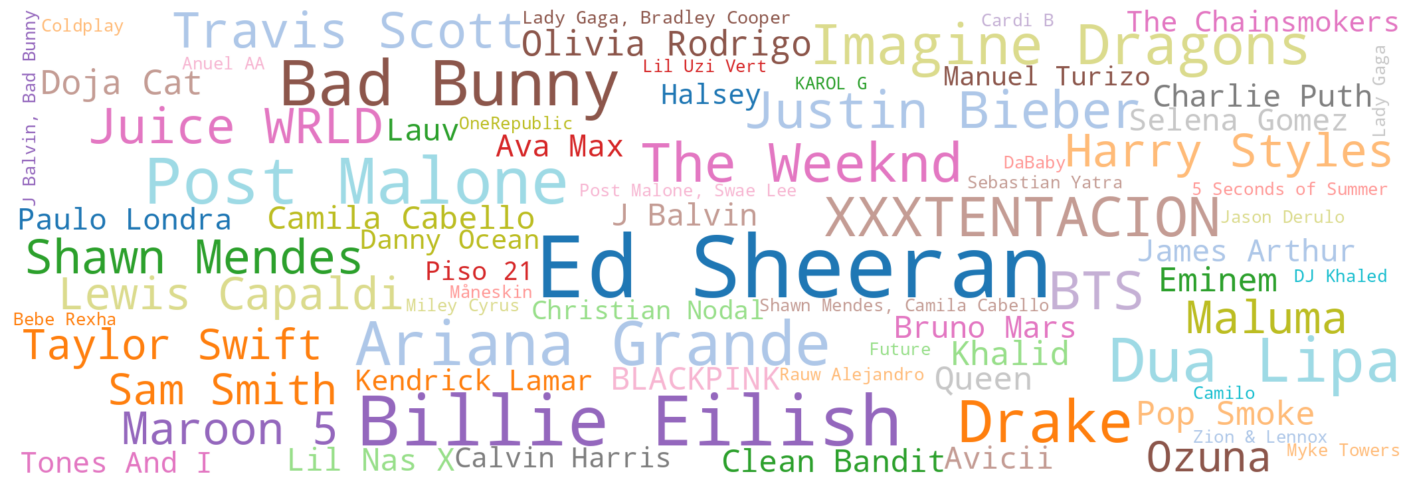

In [242]:
wc = WordCloud(max_font_size=130, min_font_size=25, colormap='tab20', background_color='white', 
    prefer_horizontal=.95, width=2100, height=700, random_state=0)
cloud = wc.generate_from_frequencies(artist_counts_pd.set_index("artist")["song_count"].to_dict())
plt.figure(figsize=(18,15))
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Song analysis


In [ ]:
with open(results_path + "top_rank_one_songs.pkl", "rb") as f:
    top_rank_one_songs_pd = pickle.load(f)
top_rank_one_songs_pd